In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
train = pd.read_csv('Physical_Activity_Monitoring_unlabeled.csv')

In [100]:
#исследуем данные
train.head()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,2801.61,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,441.01,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [101]:
print(train.isna().sum())

timestamp               0
handTemperature      4041
handAcc16_1          4041
handAcc16_2          4041
handAcc16_3          4041
handAcc6_1           4041
handAcc6_2           4041
handAcc6_3           4041
handGyro1            4041
handGyro2            4041
handGyro3            4041
handMagne1           4041
handMagne2           4041
handMagne3           4041
handOrientation1     4041
handOrientation2     4041
handOrientation3     4041
handOrientation4     4041
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3

In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

In [103]:
#в данных много пропусков

In [104]:
train.shape

(534601, 53)

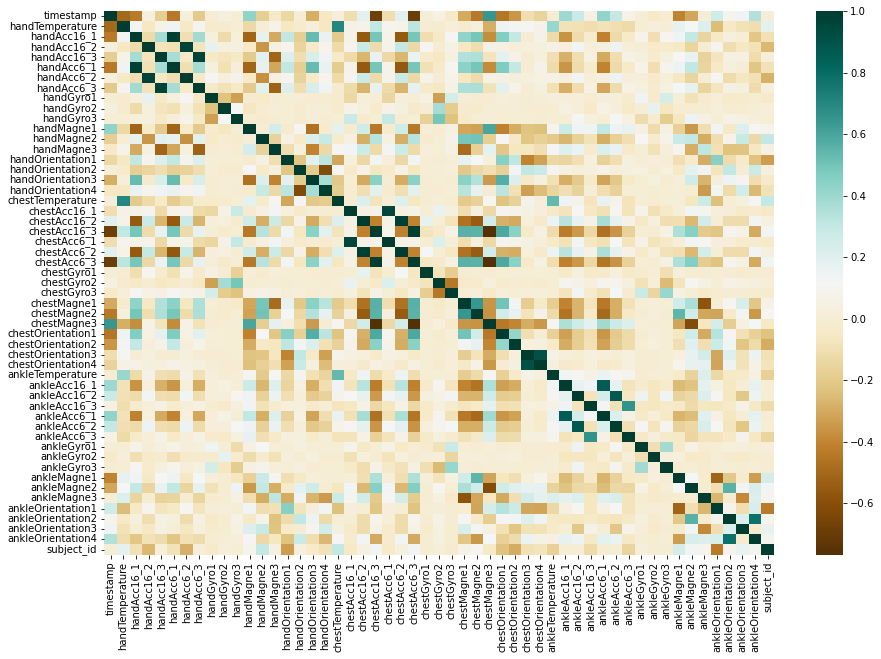

In [105]:
from pandas.plotting import scatter_matrix
import numpy as np

df_corr = train.corr()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, cmap = "BrBG",ax=ax)
plt.show()

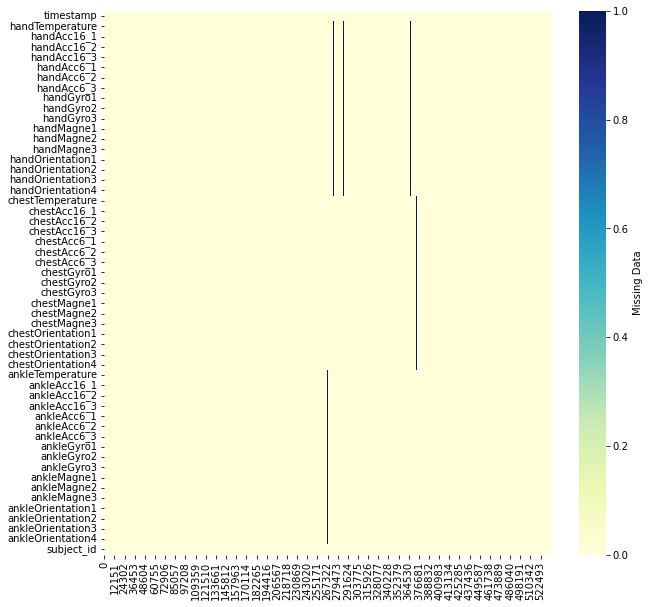

In [106]:
#визуализируем наличие пропусков
plt.figure(figsize=(10,10))
sns.heatmap(train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

In [107]:
#посмотрим через альтернативные варианты

In [108]:
!pip install missingno

<AxesSubplot:>

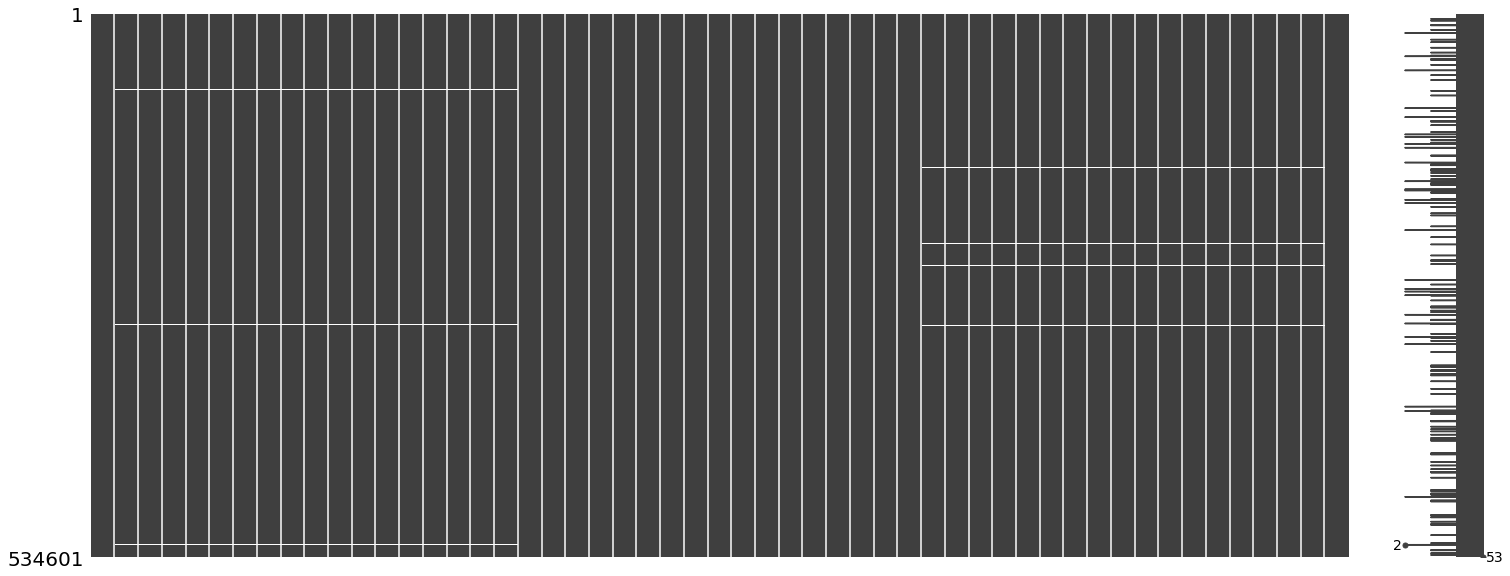

In [109]:
import missingno as msno
msno.matrix(train)

<AxesSubplot:>

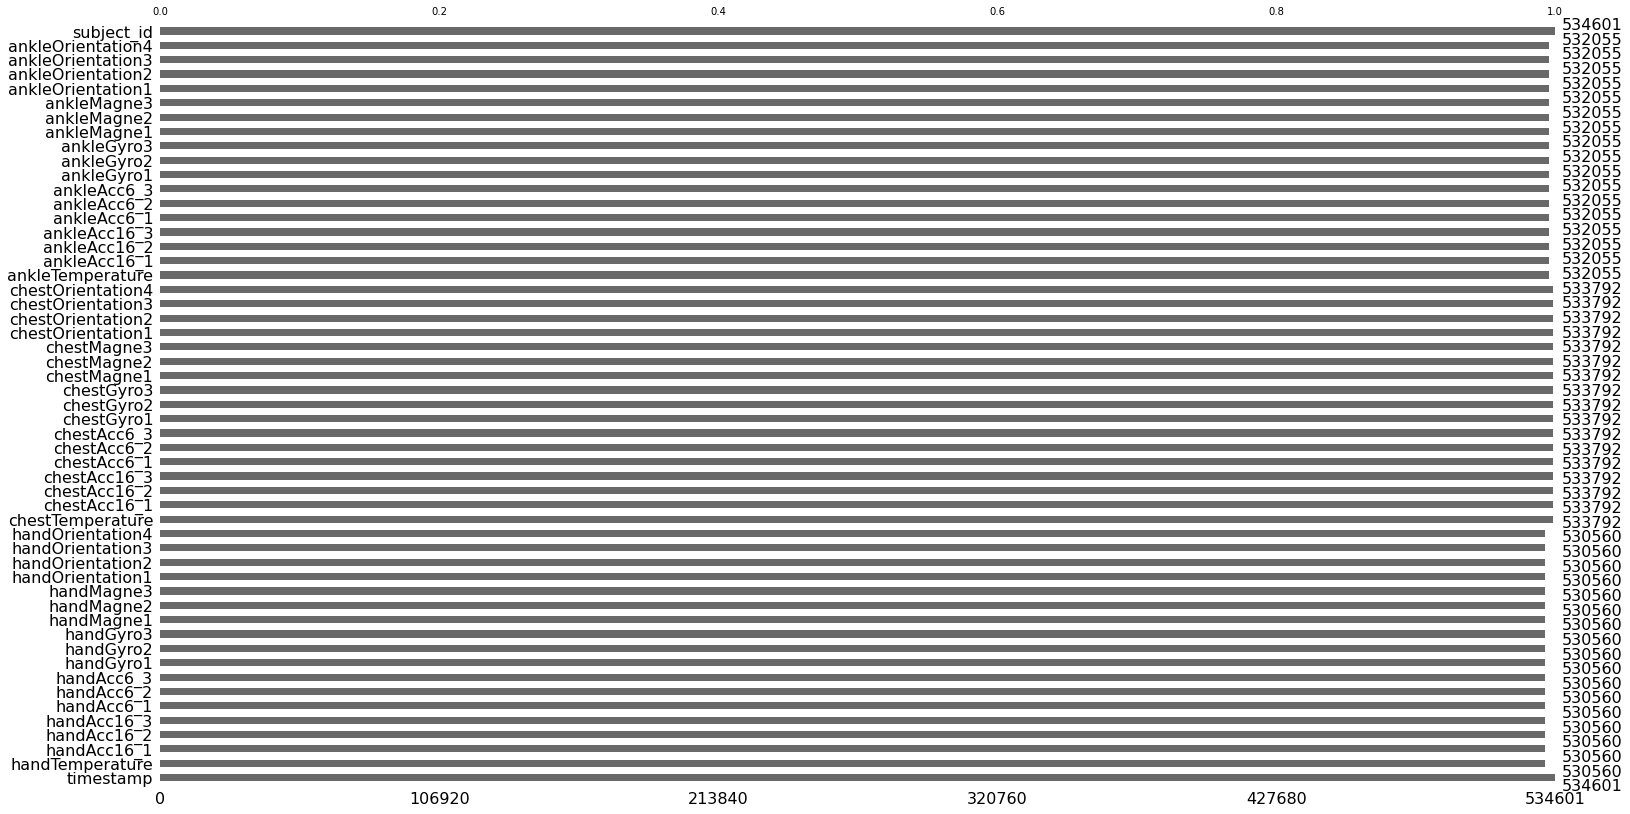

In [110]:
msno.bar(train)

In [111]:
#начнем предобработку данных

In [112]:
# для начала удалим из набора данных признаки, пропуски в которых превыщают 4 000
train.drop(columns=['handTemperature', 'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2', 'handAcc6_3',
                 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1', 'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
                 'handOrientation3', 'handOrientation4'], inplace=True)
train.isna().sum() 

timestamp               0
chestTemperature      809
chestAcc16_1          809
chestAcc16_2          809
chestAcc16_3          809
chestAcc6_1           809
chestAcc6_2           809
chestAcc6_3           809
chestGyro1            809
chestGyro2            809
chestGyro3            809
chestMagne1           809
chestMagne2           809
chestMagne3           809
chestOrientation1     809
chestOrientation2     809
chestOrientation3     809
chestOrientation4     809
ankleTemperature     2546
ankleAcc16_1         2546
ankleAcc16_2         2546
ankleAcc16_3         2546
ankleAcc6_1          2546
ankleAcc6_2          2546
ankleAcc6_3          2546
ankleGyro1           2546
ankleGyro2           2546
ankleGyro3           2546
ankleMagne1          2546
ankleMagne2          2546
ankleMagne3          2546
ankleOrientation1    2546
ankleOrientation2    2546
ankleOrientation3    2546
ankleOrientation4    2546
subject_id              0
dtype: int64

In [113]:
train.columns

Index(['timestamp', 'chestTemperature', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'chestOrientation1', 'chestOrientation2',
       'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
       'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
       'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
       'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
       'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4',
       'subject_id'],
      dtype='object')

In [114]:
#заполним пропуски с помощью среднего значения
col_missing = ['chestTemperature', 'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
               'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1',
               'chestMagne2', 'chestMagne3', 'chestOrientation1', 'chestOrientation2',
               'chestOrientation3', 'chestOrientation4', 'ankleTemperature',
               'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 'ankleAcc6_1',
               'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2', 'ankleGyro3',
               'ankleMagne1', 'ankleMagne2', 'ankleMagne3', 'ankleOrientation1',
               'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

for i in col_missing:
    train[i].fillna(train[i].mean(), inplace=True)

train.isna().sum()

timestamp            0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2           0
ankleGyro3           0
ankleMagne1          0
ankleMagne2          0
ankleMagne3          0
ankleOrientation1    0
ankleOrientation2    0
ankleOrientation3    0
ankleOrientation4    0
subject_id           0
dtype: int64

In [115]:
#удалим ненужный по логике датасета признак
train = train.drop(columns=['timestamp'])

In [116]:
%%time
from sklearn.cluster import KMeans

n_clusters = 6

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(train)

# inertia
inertia = clusterer.inertia_
cluster_labels

CPU times: total: 27.9 s
Wall time: 7.81 s


array([2, 1, 5, ..., 3, 4, 5])

In [117]:
cluster_labels

array([2, 1, 5, ..., 3, 4, 5])

In [118]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 6 , the inertia is : 600331124.3322098


In [119]:
#посмотрим результат по силуэту

In [120]:
%%time
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(train, cluster_labels)

CPU times: total: 1h 24min 46s
Wall time: 55min 56s


In [121]:
print("For n_clusters =", n_clusters,
      ", the silhouette is :", silhouette_avg)

For n_clusters = 6 , the silhouette is : 0.28192906936927026


In [122]:
#найдем оптимальное количество кластеров, используя метод локтя

In [123]:
%%time

inertia_df = pd.DataFrame(data=[], index=range(3, 12), columns=['inertia'])
                                                             
for n_clusters in range(3, 12):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(train)
    
    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_  

CPU times: total: 8min 15s
Wall time: 2min 52s


<AxesSubplot:>

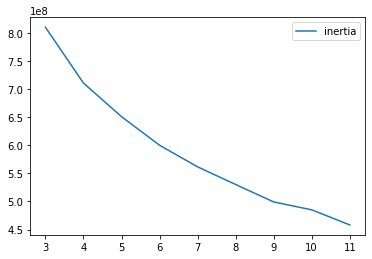

In [124]:
inertia_df.plot()

In [125]:
predictions = pd.DataFrame(cluster_labels, columns=['activityID'])
predictions = predictions.reset_index()

predictions

,index,activityID
0,0,1
1,1,8
2,2,10
3,3,6
4,4,2
...,...,...
534596,534596,7
534597,534597,6
534598,534598,5
534599,534599,7


In [126]:
predictions['activityID'].unique()

array([ 1,  8, 10,  6,  2,  4,  0,  7,  5,  3,  9])

In [127]:
import numpy as np

one = 1
two = 8
three = 10
four = 6
five = 2
six = 4
seven = 0
eight = 7
nine = 5
ten = 3
eleven = 9
predictions['new'] = np.where(predictions['activityID'] == one, 1,
                      np.where(predictions['activityID'] == two, 2,
                               np.where(predictions['activityID'] == three, 3,
                                        np.where(predictions['activityID'] == four, 4,
                                                 np.where(predictions['activityID'] == five, 5,
                                                          np.where(predictions['activityID'] == six, 6,
                                                                   np.where(predictions['activityID'] == seven, 7,
                                                                            np.where(predictions['activityID'] == eight, 8,
                                                                                     np.where(predictions['activityID'] == nine, 9,
                                                                                              np.where(predictions['activityID'] == ten, 10,
                                                                                                       np.where(predictions['activityID'] == eleven, 11,-1)))))))))))
predictions['new'].value_counts()

5     113827
3     101500
1      76059
8      58553
7      50259
2      43942
4      35671
10     16665
6      15728
11     11583
9      10814
Name: new, dtype: int64

In [128]:
predictions = predictions.drop(columns=['activityID'])

predictions = predictions.rename(columns={"new": "activityID"})
predictions.head()

predictions['activityID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [129]:
predictions.to_csv("solution.csv", index=False)